In [2]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

# 11장 시계열(time series)
* 금융, 경제, 생태학, 신경 과학, 서버 로그 데이터 분석 등 분야에서 사용되는 구조화된 데이터
* 시간상의 여러 지점을 관측하거나 측정할수 있는 모든 것
* 시간 내에서 특정 순간의 타임스탬프로 색인된 데이터

## 1. datetime 모듈의 자료형
* datetime: 날짜와 시간을 함께 나타내는 자료형
* date: 날짜(연, 월, 일)만을 나타내는 자료형
* time: 시간만을 나타내는 자료형
* timedelta: 두 날짜 또는 시간 사이의 차이를 나타내는 자료형



## 2. datetime의 속성
* year: 년도
* month: 월
* day: 일
* hour: 시간
* minute: 분
* second: 초
* microsecond: 마이크로초

## 3. datetime 자료형의 메서드
* now(): 현재 날짜와 시간을 반환
* today(): 오늘 날짜를 반환

In [3]:
# ex 1 : 사용법
from datetime import datetime
now = datetime.now()
print(now)
print(type(now)) #datetime 객체

2024-05-07 15:15:32.878292
<class 'datetime.datetime'>


In [6]:
# ex 2 : datetime 객체에서 연,월,일 정보 추출(!!!!)
now.year
now.month
now.day

7

## 4. timedelta 자료형의 속성
* days: 일
* seconds: 초
* microseconds: 마이크로초

In [7]:
delta =  datetime.now() - datetime(2024, 1, 1)
delta.days

127

## 5. datetime 포맷 규칙
* %Y: 년도 (4자리)
* %m: 월 (2자리)
* %d: 일 (2자리)
* %H: 시간 (24시간제, 2자리)
* %M: 분 (2자리)
* %S: 초 (2자리)


In [14]:
# datetime -> 문자열 datetime 객체로 변환
stamp = datetime(2024, 5, 6)

#1)
str(stamp)
#2)
stamp.strftime("%Y-%m-%d")

'2024-05-06'

## 6. 시계열의 종류
* 파이썬 문자열
* datetime 객체로 표현되는 타임스템프로 색인된 Series

In [18]:
# 문자열 -> datetime 날짜로 파싱
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")
type(datetime)


type

In [19]:
# 날짜 문자열 리스트 -> datetime으로 파싱
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)
datetime # DatetimeIndex 객체(중요!!)


datetime.datetime

In [22]:
# 실습> datetime 객체 생성
datestrs + [None]
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isna(idx)

array([False, False,  True])

## 7. 시계열의 색인, 선택, 부분 선택


In [23]:
# (1) datetime 타임스템프로 색인된 Series 객체
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [24]:
ts.index # DatetimeIndex

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [25]:
# 첫 번째 샘플 추출 :  인덱싱
stamp = ts.index[0]
ts[stamp]

-0.20470765948471295

In [26]:
#인덱싱 : DatetimeIndex 의 색인 레벨
ts["2011-01-10"]

1.9657805725027142

In [27]:
# 슬라이싱
ts[::2]


2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

### [실습] 가상 시계열 데이터 생성
* pandas.date_range()  
  * pandas 라이브러리의 함수로, 특정 기간 내의 날짜 범위를 생성
  * start: 시작 날짜
  * end: 종료 날짜
  * periods: 생성할 날짜 수
  * freq: 날짜 간격 (기본값: 'D' (하루))

In [33]:
index = pd.date_range("2012-04-01", "2012-06-01")
index = pd.date_range(start="2012-04-01", periods=20)
pd.date_range("2012-04-01", "2012-06-01")
pd.date_range(start="2012-04-01", periods=20)
pd.date_range(end="2012-06-01", periods=20)
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [29]:
# ex>  date_range()함수를 이용하여 날짜 시컨스 생성
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods=1000))
longer_ts
longer_ts["2001"]

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [30]:
longer_ts["2001-05"]

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [36]:
# ex> 시계열 데이타프레임 생성(!!)
np.random.seed(1)
dates = pd.date_range("2000-01-01", periods=10, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((10, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])
long_df
long_df.loc["2000-01"]

,Colorado,Texas,New York,Ohio
2000-01-05,1.624345,-0.611756,-0.528172,-1.072969
2000-01-12,0.865408,-2.301539,1.744812,-0.761207
2000-01-19,0.319039,-0.249370,1.462108,-2.060141
2000-01-26,-0.322417,-0.384054,1.133769,-1.099891


In [37]:
# grouping
grouped = long_df.groupby(level=0)
for n, g in grouped:
  print(f"name : {n}")
  print(g)
  print()


name : 2000-01-05 00:00:00
            Colorado     Texas  New York      Ohio
2000-01-05  1.624345 -0.611756 -0.528172 -1.072969

name : 2000-01-12 00:00:00
            Colorado     Texas  New York      Ohio
2000-01-12  0.865408 -2.301539  1.744812 -0.761207

name : 2000-01-19 00:00:00
            Colorado    Texas  New York      Ohio
2000-01-19  0.319039 -0.24937  1.462108 -2.060141

name : 2000-01-26 00:00:00
            Colorado     Texas  New York      Ohio
2000-01-26 -0.322417 -0.384054  1.133769 -1.099891

name : 2000-02-02 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-02 -0.172428 -0.877858  0.042214  0.582815

name : 2000-02-09 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-09 -1.100619  1.144724  0.901591  0.502494

name : 2000-02-16 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-16  0.900856 -0.683728  -0.12289 -0.935769

name : 2000-02-23 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-23 -0.

In [38]:
#groupby()에 의한 메서드 : mean(), std(), count(), size() , max(),min(),sum(),.......
grouped.mean()
grouped.count()
grouped.size()

2000-01-05    1
2000-01-12    1
2000-01-19    1
2000-01-26    1
2000-02-02    1
2000-02-09    1
2000-02-16    1
2000-02-23    1
2000-03-01    1
2000-03-08    1
Freq: W-WED, dtype: int64

# [실습] 시계열 데이터셋 로딩

In [39]:
# ex > 시계열 데이터셋 파일 -> 시계열 색인을 갖는 데이터프레임 객체로 변환
# index_col=0
close_px_all = pd.read_csv("examples/stock_px.csv", parse_dates=True, index_col= 0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [43]:
close_px_all.columns  # AAPL: Apple Inc, MSFT: Microsoft Corporation, XOM: Exxon Mobil Corporation, SPX: S&P 500 Index


Index(['AAPL', 'MSFT', 'XOM', 'SPX'], dtype='object')

In [41]:
#인덱싱
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

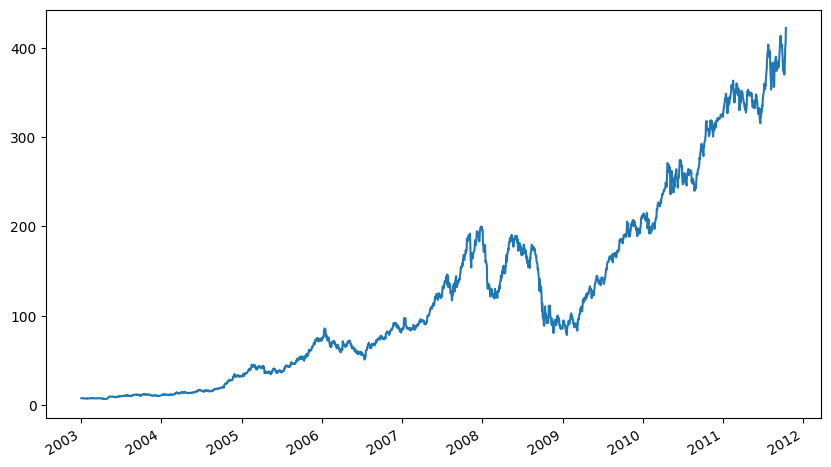

In [42]:
# 시각화 방법
#(1) line plots
# close_px["AAPL"].plot.bar()

close_px["AAPL"].plot(kind='line')

### < pandas.rolling() 메서드>
* pandas 라이브러리의 함수로, 특정 기간 동안의 데이터를 그룹화하여 통계를 계산
* 롤링창은 시계열 데이터 분석에 매우 중요
* 롤링창을 사용하여 데이터 변화 추세, 변동성 측정, 이상치 감지, 예측에 사용
* 롤링창을 사용하여 롤링창 내의 데이터 평균, 표준편차, 최대값/최소값, 회귀분석 등
* rolling() 함수의 인자:
  * window: 그룹화할 데이터의 수
  * min_periods: 계산에 포함할 최소 데이터 수 (기본값: window)
  * center: 그룹화할 데이터의 중심을 맞출지 여부 (기본값: False)
  * win_type: 그룹화할 데이터의 가중치 (기본값: None)


2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    346.53988
2011-10-11    346.93180
2011-10-12    347.28160
2011-10-13    347.64332
2011-10-14    348.09336
Name: AAPL, Length: 2214, dtype: float64


<Axes: >

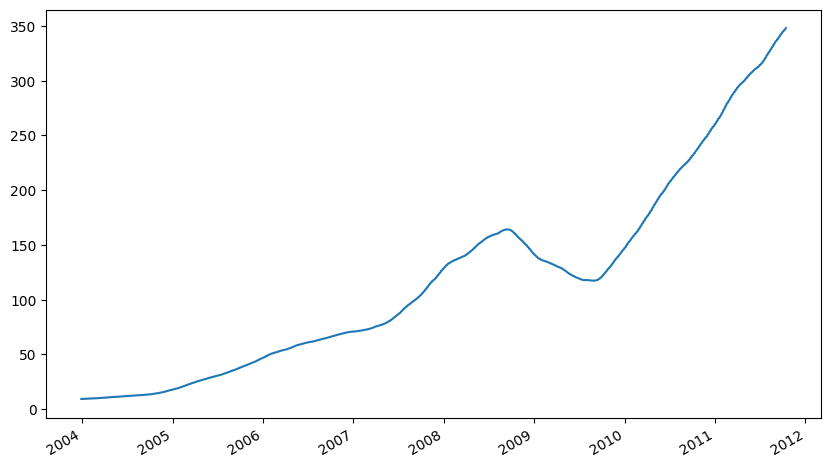

In [45]:
# (1)  롤링창 만들어 통계 계산
# DataFrame의 "AAPL" 열에 대한 rolling() 메서드를 사용하여 크기가 250인 롤링 창을 만드는 방법:
# 롤링 창 사용하기: 롤링 창을 만들면 다양한 통계 함수를 사용하여 창 내의 데이터를 분석
# line plots
plt.figure()
print(close_px["AAPL"].rolling(250).mean())
close_px["AAPL"].rolling(250).mean().plot()


<Axes: >

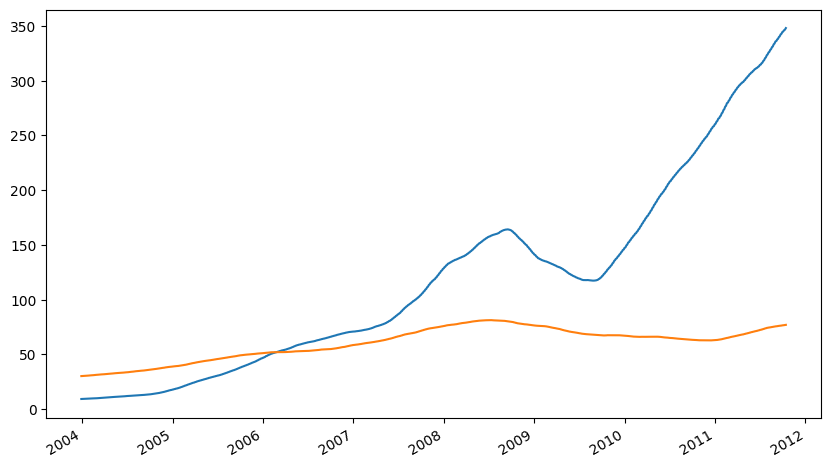

In [46]:
# (2) 롤링창 만들어 통계 계산 - 2 개의 종가에 대한 250일 롤링 평균 계산
plt.figure()
close_px["AAPL"].rolling(window = 250).mean().plot()
close_px["XOM"].rolling(window = 250).mean().plot()



<Axes: >

<Figure size 1000x600 with 0 Axes>

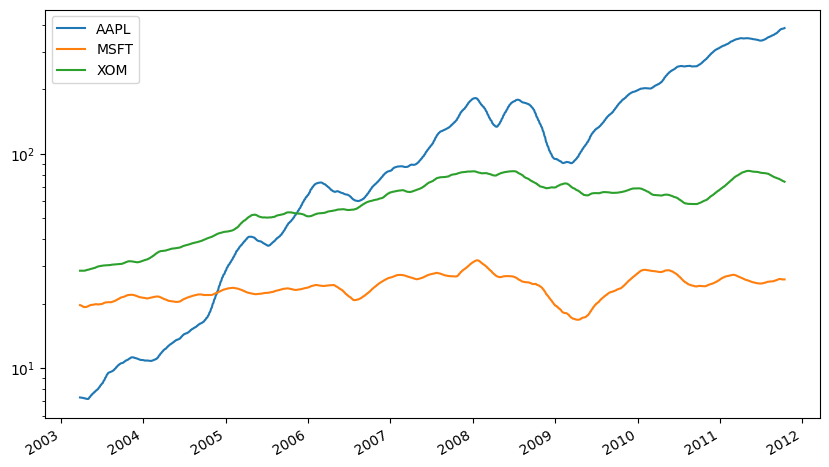

In [47]:
# (3) 롤링창 만들어 통계 계산 - 모든 종목의 종가에 대한 60일 롤링 평균 계산:
# 2. 60일 롤링 평균을 로그 스케일로 플롯: y축이 로그 스케일로 플롯
plt.figure()
close_px.rolling(60).mean().plot(logy=True)


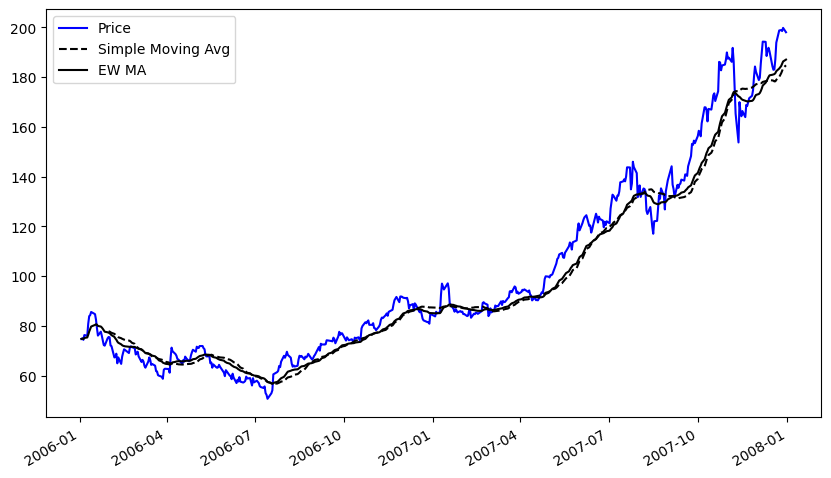

In [48]:
# # Create a figure
plt.figure()
# Select the desired date range for AAPL stock prices
aapl_px = close_px["AAPL"]["2006":"2007"]
# Calculate the 30-day simple moving average
ma30 = aapl_px.rolling(30).mean()
# Calculate the 30-day exponential moving average
ewma30 = aapl_px.ewm(span=30).mean()
# Plot the AAPL stock prices : sets the line style to solid (-) and the color to blue (b).
aapl_px.plot(style="b-", label="Price")
# Plot the 30-day simple moving average
ma30.plot(style="k--", label="Simple Moving Avg")
# Plot the 30-day exponential moving average
ewma30.plot(style="k-", label="EW MA")
plt.legend()
plt.show()